In [5]:
%pip install numpy tqdm tensorflow matplotlib scikit-learn PCA
%pip install --upgrade jupyter ipywidgets


Note: you may need to restart the kernel to use updated packages.



In [ ]:
%pip install -c conda-forge ipywidgets

In [7]:

import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import tensorflow as tf
import os
import time
from keras.preprocessing import image
from keras.applications.efficientnet import EfficientNetB7, preprocess_input

In [8]:
model = EfficientNetB7(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [9]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [10]:
root_dir = '../TP2'
filenames = sorted(get_file_list(root_dir))

In [11]:
root_dir

'../TP2'

In [6]:
from tqdm.notebook import tqdm
feature_list = []
for i in tqdm(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

  0%|          | 0/300 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [7]:
import os
import pickle

current_folder = os.getcwd()  # Get the current folder path
data_folder = os.path.join(current_folder, '..', 'Code', 'data')

filenames_path = os.path.join(data_folder, 'filenames_unsplash.pickle')
feature_list_path = os.path.join(data_folder, 'feature_list.pickle')

# Dumping pickle files
pickle.dump(feature_list, open(feature_list_path, 'wb'))
pickle.dump(filenames, open(filenames_path, 'wb'))

In [8]:
import os
import pickle

current_folder = os.getcwd()  # Get the current folder path
data_folder = os.path.join(current_folder, 'data')

filenames_path = os.path.join(data_folder, 'filenames_unsplash.pickle')
feature_list_path = os.path.join(data_folder, 'feature_list.pickle')

filenames = pickle.load(open(filenames_path, 'rb'))
feature_list = pickle.load(open(feature_list_path, 'rb'))


In [10]:
feature_vector_length = len(feature_list[0])
print("Feature vector length:", feature_vector_length)

total_feature_vectors = len(feature_list)
print("Total feature vectors:", total_feature_vectors)

Feature vector length: 125440
Total feature vectors: 300


In [12]:
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm

num_feature_dimensions = 100
# Increase the batch size to accommodate the number of components
batch_size = 100  # Or any value larger than 1000

# Initialize IPCA
ipca = IncrementalPCA(n_components=num_feature_dimensions, batch_size=batch_size)

# Process the data in batches with tqdm for progress tracking
for batch_start in tqdm(range(0, len(feature_list), batch_size)):
    batch_end = min(batch_start + batch_size, len(feature_list))
    batch_features = feature_list[batch_start:batch_end]
    ipca.partial_fit(batch_features)



# Transform the entire dataset using IPCA
feature_list_compressed = ipca.transform(feature_list)


100%|██████████| 3/3 [00:25<00:00,  8.53s/it]


In [19]:
compressed_feature_list_path = os.path.join('data', 'compressed_feature_list.pkl')
ipca_function_path = os.path.join('data', 'ipca.pickle')

# Dump the compressed feature list to a pickle file in the 'data' folder
with open(compressed_feature_list_path, 'wb') as f:
    pickle.dump(feature_list_compressed, f)

# Dump the ipca function to a pickle file in the 'data' folder
with open(ipca_function_path, 'wb') as f:
    pickle.dump(ipca, f)

In [20]:
compressed_feature_list_path = os.path.join('data', 'compressed_feature_list.pkl')
ipca_function_path = os.path.join('data', 'ipca_function.pkl')

# Load the compressed feature list from the pickle file
with open(compressed_feature_list_path, 'rb') as f:
    compressed_feature_list = pickle.load(f)

# Load the ipca function from the pickle file
with open(ipca_function_path, 'rb') as f:
    ipca = pickle.load(f)

In [21]:
n_features = feature_vector_length = len(compressed_feature_list[0])
X = np.array(feature_list_compressed).reshape(-1,n_features)
print(X)

[[ 2.88681072e-01 -6.10428712e-02  1.60071988e-01 ...  3.82986970e-02
   5.49310728e-02 -5.77209757e-04]
 [-1.65331454e-01 -4.33949642e-02 -3.03129534e-01 ... -1.66476755e-01
  -9.79629932e-05 -5.89698773e-02]
 [ 4.50832631e-02 -1.92113330e-01  8.49053420e-03 ... -5.56029796e-03
  -2.48612664e-02 -8.67455579e-02]
 ...
 [ 3.97046394e-01 -1.02039354e-01  4.95530014e-02 ...  1.92504328e-02
  -2.42667895e-02  2.52643829e-02]
 [-2.05420586e-01 -4.05425064e-01 -7.91396399e-02 ... -7.98175533e-02
   3.57535549e-02  1.29474301e-01]
 [ 1.80191066e-01 -5.96080840e-02 -5.94551931e-02 ... -5.46553778e-02
   2.37959383e-02  1.34947429e-02]]


In [22]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='kd_tree', metric='euclidean').fit(X)
distances, indices = neighbors.kneighbors([X[0]])

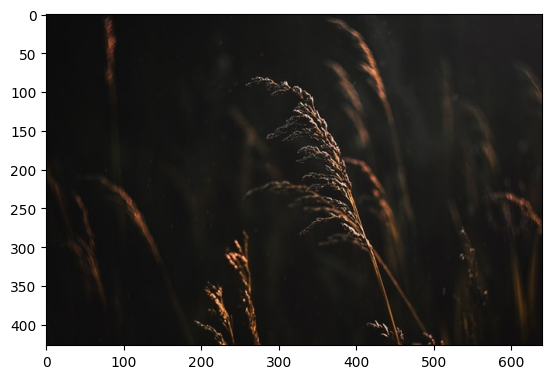

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread(filenames[250]))

In [25]:
for i in range(5):
    print(distances[0][i])

0.0
0.4125372518446227
0.41799140140971
0.4297323783074506
0.4300508307609771


In [26]:
def plot_images(image_paths, distances):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    for ax, image_path, distance in zip(axes, image_paths, distances):
        image = mpimg.imread(image_path)
        ax.imshow(image)
        ax.set_title(f"Distance: {distance:.2f}")
        ax.axis('off')
    plt.show()

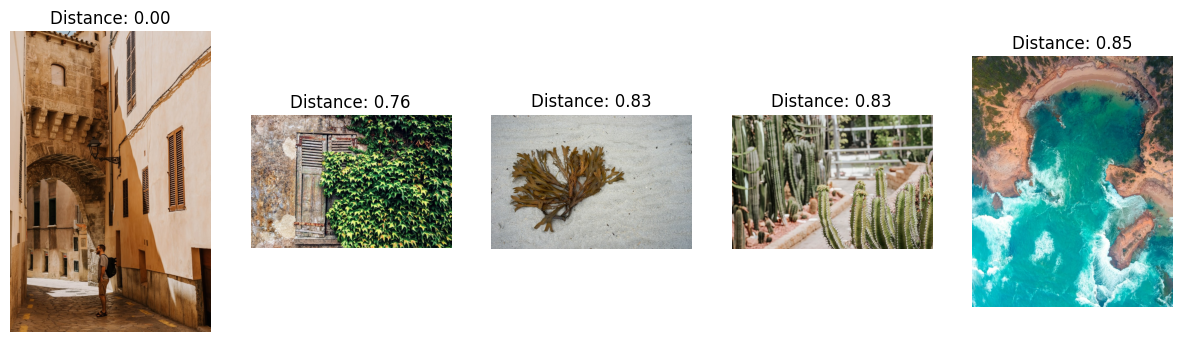

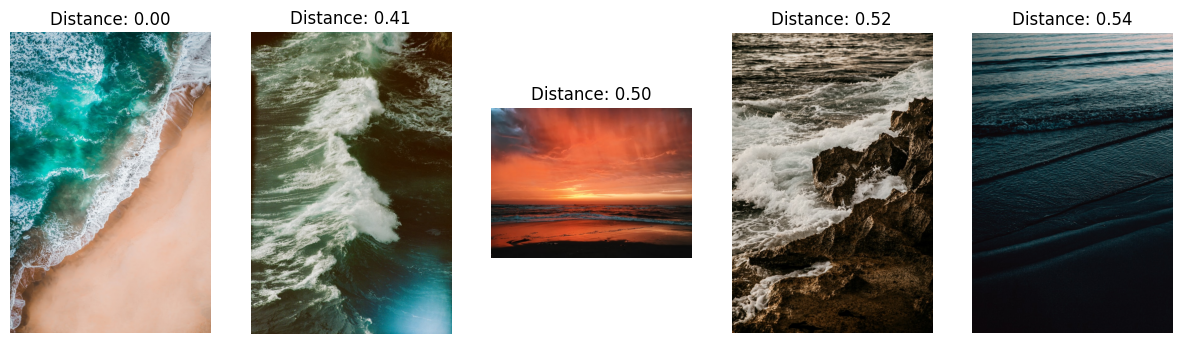

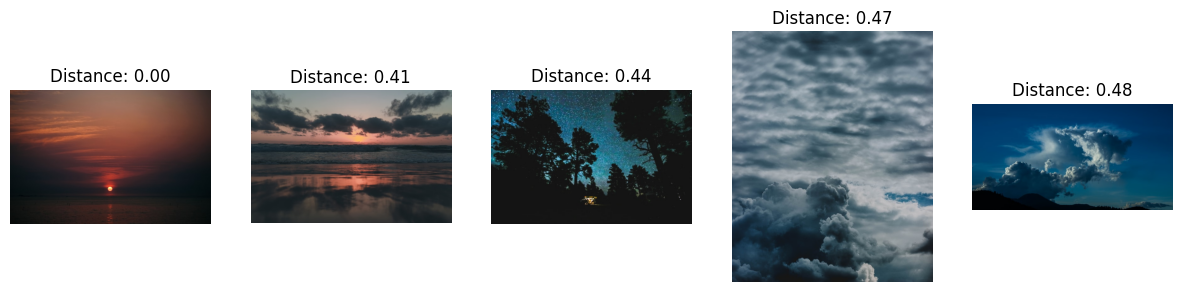

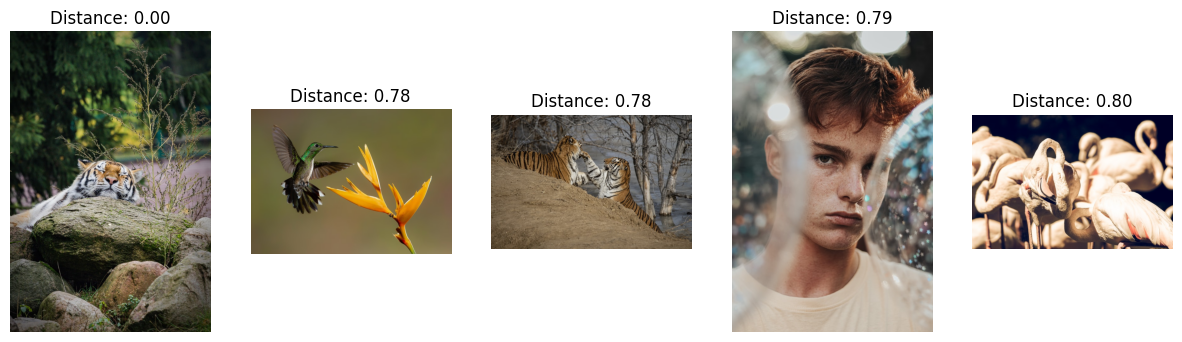

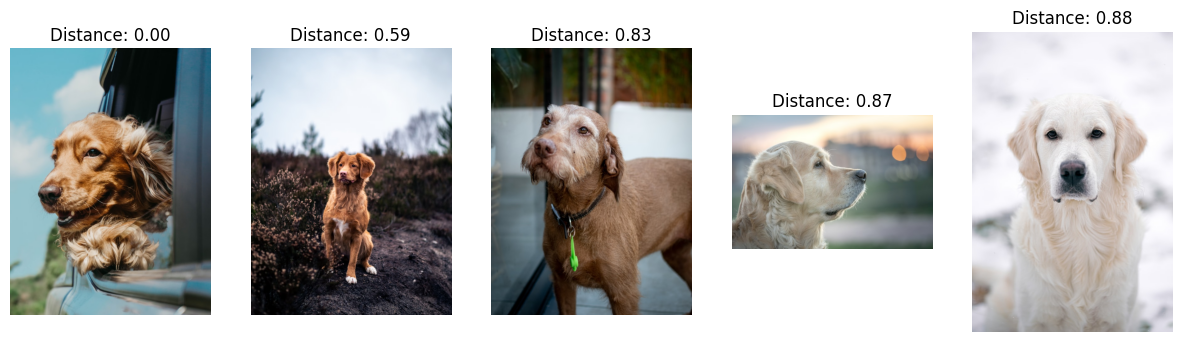

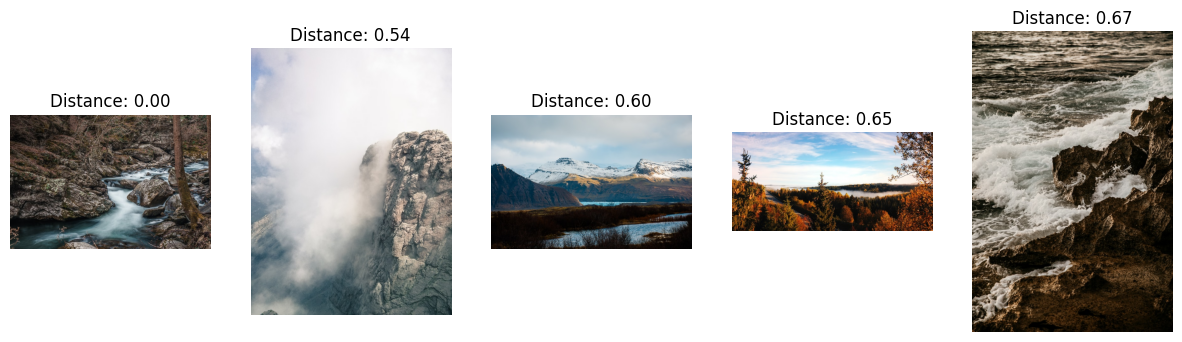

In [28]:
import random
for i in range(6):
    random_image_index = random.randint(0,100)
    distances, indices = neighbors.kneighbors([compressed_feature_list[random_image_index]])
    # don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + [filenames[indices[0][i]] for i in range(1,5)]
    plot_images(similar_image_paths, distances[0])

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.neighbors import NearestNeighbors

X = np.array(feature_list)
query_image_paths = 'vivek.jpg'

query_image_features = extract_features(query_image_paths, model)

distances, indices = neighbors.kneighbors([query_image_features])

similar_image_indices = indices.flatten()

for i, index in enumerate(similar_image_indices):
    image_path = filenames[index]
    image = mpimg.imread(image_path)
    plt.subplot(1, 6, i + 2)
    plt.imshow(image)
    plt.title(f'Similar Image {i + 1}')
    plt.axis('off')

plt.show() 

1/1 [==============================] - 8s 8s/step


ValueError: X has 125440 features, but NearestNeighbors is expecting 900 features as input.